In [23]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(latex2exp)
options(repr.plot.width = 12, repr.plot.height = 8)

In [3]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

In [56]:
data <- read.csv("data/data.csv")
data

day_number,region,country,state,city,month,day,year,temp
<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<dbl>
1,Europe,Poland,NA,Warsaw,1,1,1995,35.4
2,Europe,Poland,NA,Warsaw,1,2,1995,30.5
3,Europe,Poland,NA,Warsaw,1,3,1995,27.2
4,Europe,Poland,NA,Warsaw,1,4,1995,22.9
5,Europe,Poland,NA,Warsaw,1,5,1995,18.7
6,Europe,Poland,NA,Warsaw,1,6,1995,19.7
7,Europe,Poland,NA,Warsaw,1,7,1995,21.6
8,Europe,Poland,NA,Warsaw,1,8,1995,26.6
9,Europe,Poland,NA,Warsaw,1,9,1995,27.4


In [57]:
missings <- data %>% filter(temp == -99)
missings

day_number,region,country,state,city,month,day,year,temp
<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<dbl>
1454,Europe,Poland,NA,Warsaw,12,24,1998,-99
1455,Europe,Poland,NA,Warsaw,12,25,1998,-99
1460,Europe,Poland,NA,Warsaw,12,30,1998,-99
1461,Europe,Poland,NA,Warsaw,12,31,1998,-99
1471,Europe,Poland,NA,Warsaw,1,10,1999,-99
2726,Europe,Poland,NA,Warsaw,6,18,2002,-99
2727,Europe,Poland,NA,Warsaw,6,19,2002,-99
2728,Europe,Poland,NA,Warsaw,6,20,2002,-99
2729,Europe,Poland,NA,Warsaw,6,21,2002,-99


In [66]:
new_data <- data[2730:4622,]

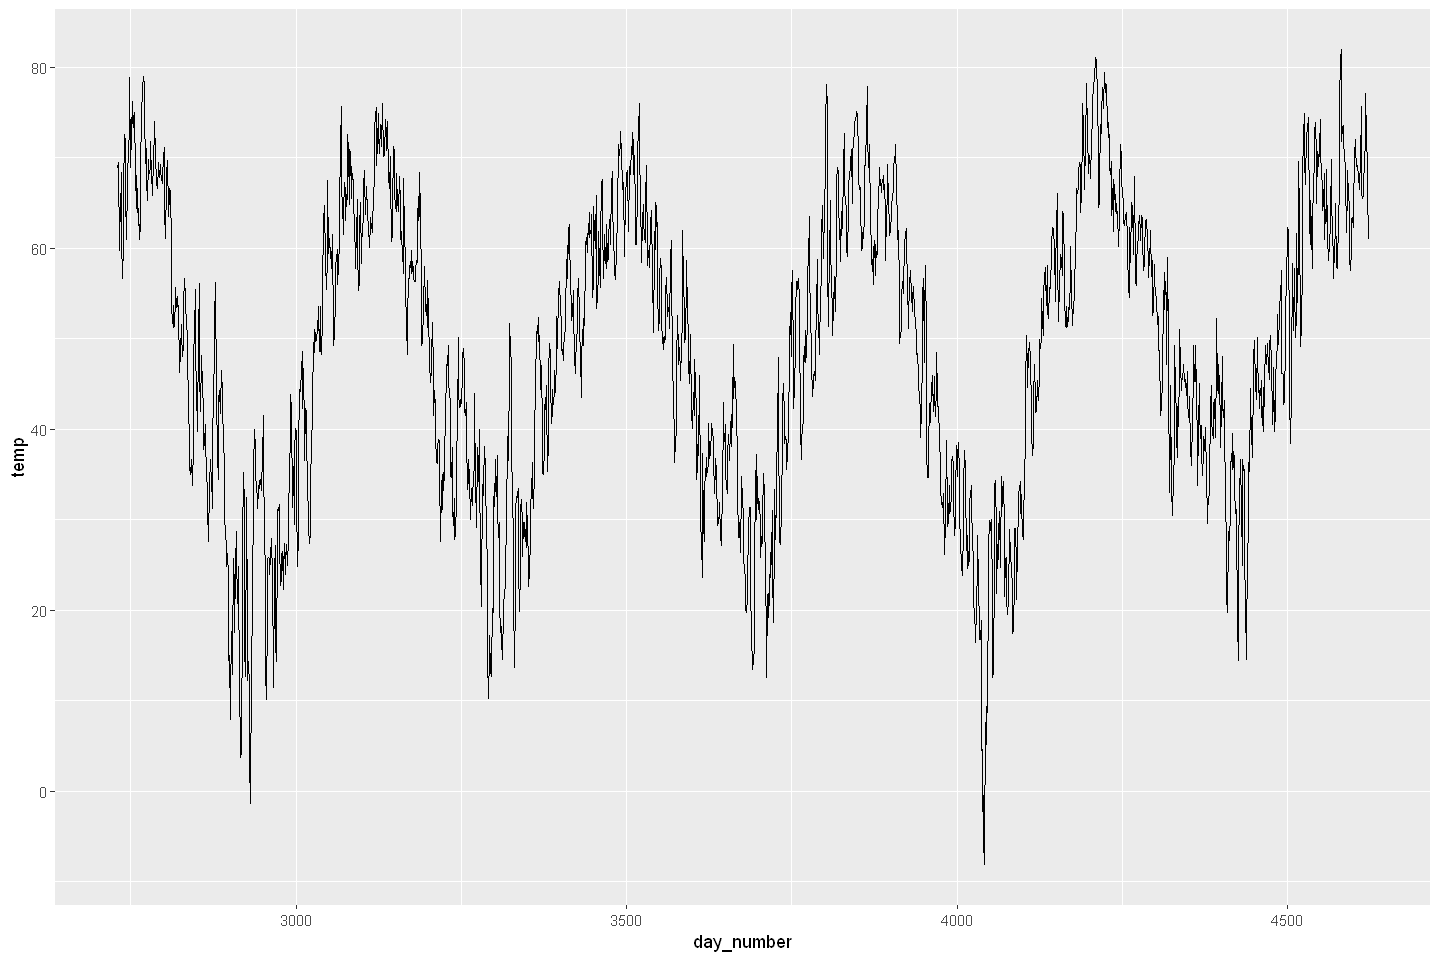

In [67]:
ggplot(new_data) + geom_line(aes(x=day_number, y=temp))